## Thompson Sampling with Gaussian Reward
- Per lecture 55

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, norm

### Constants

In [2]:
np.random.seed(1)
NUM_TRIALS = 2000
BANDIT_MEANS = [1, 2, 3]

### Bandit Class

In [3]:
class Bandit():
    def __init__(self, true_mean):
        # Working with unknown mean and known precision, so only true mean is needed
        self.true_mean = true_mean # Mean of the data
        # Parameters for mu - prior is N(0, 1)
        self.predicted_mean = 0 # Mean of the mean
        self.lambda_ = 1 # Precision of the mean. Prior is standard normal (0,1)
        self.sum_x = 0 # for convenience. Store sum of samples
        self.tau = 1 # Precision of X, Assumed, same as variance 1
        self.N = 0
        
    def pull(self):
        # Sample from a distribution with mean true_mean and precision tau
        return np.random.randn() / np.sqrt(self.tau) + self.true_mean
    
    def sample(self):
        # Same as above as posterior is also a Gaussian
        return np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean
    
    def update(self, x):
        self.lambda_ += self.tau # Whern N = 1 then the (lambda = tau*N + lambda_) just becomes (tau + lambda_)
        self.sum_x += x
        '''
        Most confusing part
        Update posterior mean
        Denominator is just lambda
        Numerator is sum_x * tau (but no prior for mean, because we assume prior for mean is 0)
        
        '''
        self.predicted_mean = self.tau*self.sum_x / self.lambda_
        self.N += 1        

### Plot Function

In [4]:
def plot(bandits, trial):
    x = np.linspace(-3, 6, 200)
    for b in bandits:
        # Y axis is PDF of a normal distribution with mean b.predicted_mean and variance sqrt(1 / b.lambda_)
        y = norm.pdf(x, b.predicted_mean, np.sqrt(1. / b.lambda_))
        plt.plot(x, y, label="Real mean: {}, Num Plays: {}".format(b.true_mean, b.N))
    plt.title("Bandit distributions after {} trials".format(trial))
    plt.legend()
    plt.show()

### Experiment Function

In [5]:
def run_experiment():
    bandits = [Bandit(m) for m in BANDIT_MEANS]
    
    sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]
    rewards = np.empty(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        # Thompson Sampling
        j = np.argmax([b.sample() for b in bandits])
        
        # Plot posteriors
        if i in sample_points:
            plot(bandits, i)
        # pull the arm for the bandit with the largest sample

        x = bandits[j].pull()

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

        # update rewards
        rewards[i] = x

    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    for m in BANDIT_MEANS:
        plt.plot(np.ones(NUM_TRIALS)*m)
    plt.show()

    return cumulative_average

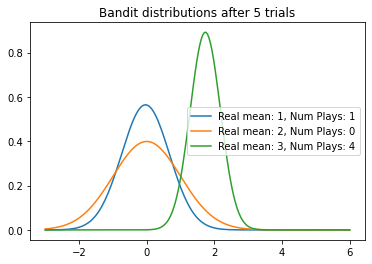

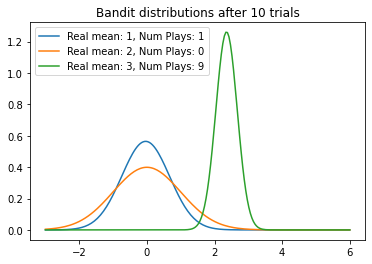

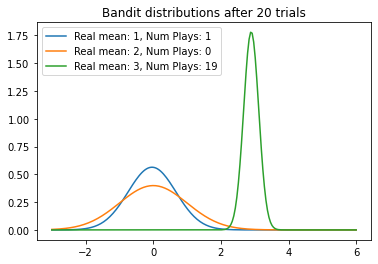

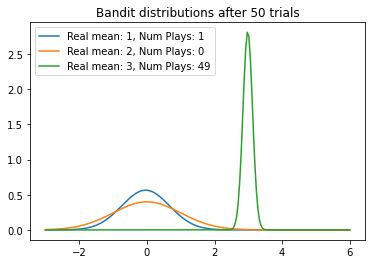

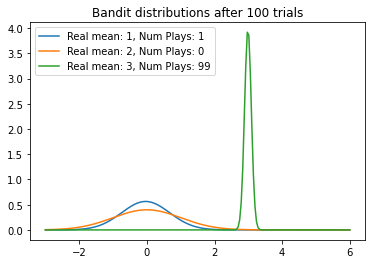

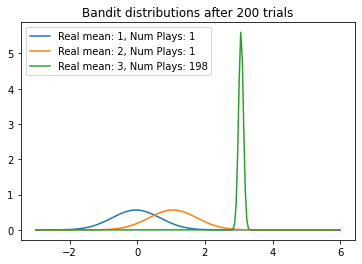

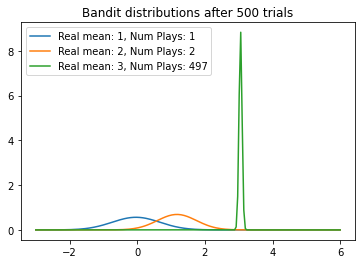

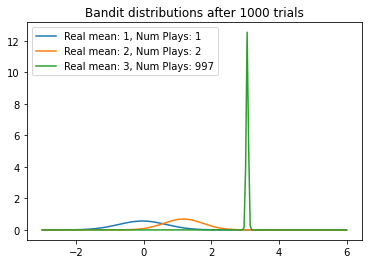

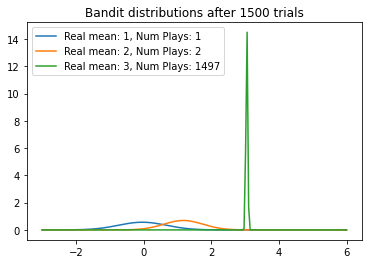

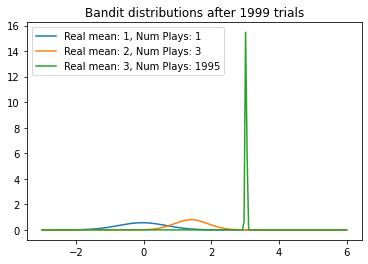

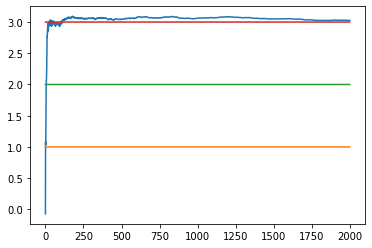

array([-0.07296862,  1.08291224,  1.03522792, ...,  3.02540608,
        3.02520262,  3.02569308])

In [6]:
run_experiment()